## The 5 Boroughs Crash Data Analysis
by Nicolas Levine

In my data analysis, I aimed to clean up the dataset, use pandas to link certain trends and compare different subcategories within the dataset, and finally I provided a short conlusion of my findings.

source: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [15]:
#here i import the modules i will need to do data cleaning and analysis
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

I am using a dataset from NYC detailing all crashes reported
https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [16]:
#here i load and print the first 15 rows of my dataset to make sure it works
nyc_crash = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)
nyc_crash.head(15)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


## Preliminary Data Cleaning

In [17]:
#here i copied my original dataframe so i can make manipulations while having a safe base dataframe
nyc_crash1 = nyc_crash.copy()
nyc_crash1.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [27]:
#in order to decrease the size of my dataset, and so i can provide a year/time frame for my analyses,
    ##i am removing all data from 2022, since it hasn't concluded
nyc_crash1['CRASH DATE']=nyc_crash1['CRASH DATE'].astype(str)

nyc_crash1 = nyc_crash1[nyc_crash1["CRASH DATE"].str.contains("2022") == False]
nyc_crash1

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,ConvertedDate
1921124,2012-07-01,8:34,BROOKLYN,11213,40.668798,-73.931120,"(40.6687978, -73.9311201)",EASTERN PARKWAY,UTICA AVENUE,NaN,...,NaN,NaN,NaN,172551,PASSENGER VEHICLE,VAN,NaN,NaN,NaN,2012-07-01
1923153,2012-07-01,1:30,NaN,NaN,NaN,NaN,NaN,CLAY AVENUE,EAST 170 STREET,NaN,...,NaN,NaN,NaN,85162,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,2012-07-01
1920946,2012-07-01,2:45,BROOKLYN,11226,40.643185,-73.949729,"(40.6431849, -73.9497292)",EAST 29 STREET,CLARENDON ROAD,NaN,...,NaN,NaN,NaN,135073,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2012-07-01
1923158,2012-07-01,14:00,BRONX,10467,40.865430,-73.867361,"(40.8654303, -73.8673609)",ALLERTON AVENUE,WHITE PLAINS ROAD,NaN,...,NaN,NaN,NaN,102719,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,2012-07-01
1923964,2012-07-01,17:30,BROOKLYN,11226,40.655340,-73.960698,"(40.6553404, -73.960698)",PARKSIDE AVENUE,PARKSIDE COURT,NaN,...,NaN,NaN,NaN,147455,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2012-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33920,2021-12-31,15:40,NaN,NaN,40.600105,-73.933230,"(40.600105, -73.93323)",AVENUE V,NaN,NaN,...,NaN,NaN,NaN,4491052,Sedan,NaN,NaN,NaN,NaN,2021-12-31
33675,2021-12-31,19:40,BRONX,10459,40.831123,-73.891480,"(40.831123, -73.89148)",NaN,NaN,1327 SOUTHERN BOULEVARD,...,NaN,NaN,NaN,4491128,Station Wagon/Sport Utility Vehicle,E-scooter,NaN,NaN,NaN,2021-12-31
33913,2021-12-31,21:54,NaN,NaN,40.666706,-73.871826,"(40.666706, -73.871826)",LINDEN BOULEVARD,NaN,NaN,...,NaN,NaN,NaN,4491234,Sedan,Bus,NaN,NaN,NaN,2021-12-31
33060,2021-12-31,5:35,NaN,NaN,40.772790,-73.837135,"(40.77279, -73.837135)",ULMER STREET,NaN,NaN,...,NaN,NaN,NaN,4490815,Sedan,Bus,NaN,NaN,NaN,2021-12-31


In [28]:
#next, i will sort the dataframe by the date that the crash ocurred
    ##https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/
nyc_crash1 = nyc_crash1.sort_values(by='CRASH DATE')
nyc_crash1

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,ConvertedDate
1921124,2012-07-01,8:34,BROOKLYN,11213,40.668798,-73.931120,"(40.6687978, -73.9311201)",EASTERN PARKWAY,UTICA AVENUE,NaN,...,NaN,NaN,NaN,172551,PASSENGER VEHICLE,VAN,NaN,NaN,NaN,2012-07-01
1922975,2012-07-01,18:30,BRONX,10455,40.814370,-73.896700,"(40.8143702, -73.8966999)",BRUCKNER BOULEVARD,EAST 156 STREET,NaN,...,NaN,NaN,NaN,76206,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2012-07-01
1923252,2012-07-01,18:55,BRONX,10467,40.863163,-73.864535,"(40.8631626, -73.8645346)",WALLACE AVENUE,MACE AVENUE,NaN,...,NaN,NaN,NaN,102724,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2012-07-01
1923250,2012-07-01,0:23,BROOKLYN,11234,40.607179,-73.916414,"(40.6071786, -73.9164142)",STRICKLAND AVENUE,NATIONAL DRIVE,NaN,...,NaN,NaN,NaN,125655,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2012-07-01
1924113,2012-07-01,22:47,BRONX,10466,40.880624,-73.840462,"(40.8806238, -73.8404618)",BOSTON ROAD,GRACE AVENUE,NaN,...,NaN,NaN,NaN,94881,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2012-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34437,2021-12-31,21:15,QUEENS,11377,40.750000,-73.899240,"(40.75, -73.89924)",63 STREET,BROADWAY,NaN,...,NaN,NaN,NaN,4491039,NaN,NaN,NaN,NaN,NaN,2021-12-31
33586,2021-12-31,13:45,NaN,NaN,40.625390,-74.135376,"(40.62539, -74.135376)",NaN,NaN,1351 FOREST AVENUE,...,Unspecified,NaN,NaN,4491049,Sedan,Sedan,Sedan,NaN,NaN,2021-12-31
33613,2021-12-31,15:00,BROOKLYN,11223,40.590748,-73.968376,"(40.590748, -73.968376)",AVENUE X,EAST 2 STREET,NaN,...,NaN,NaN,NaN,4491002,Sedan,NaN,NaN,NaN,NaN,2021-12-31
34457,2021-12-31,3:10,QUEENS,11366,40.722940,-73.800200,"(40.72294, -73.8002)",UNION TURNPIKE,168 STREET,NaN,...,NaN,NaN,NaN,4491004,NaN,NaN,NaN,NaN,NaN,2021-12-31


In [29]:
#here i am going to find out what columns have a lot of missing values
    ##https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
for col in nyc_crash1.columns:
    pct_missing = np.mean(nyc_crash1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
#this for loop traverses every column and checks if there is a value that is missing 
    ##that missing value could be "NaN" or "Not Specified"
     ###then adds them all up, divided to get the mean, and the presents it as a percent

CRASH DATE - 0%
CRASH TIME - 0%
BOROUGH - 31%
ZIP CODE - 31%
LATITUDE - 12%
LONGITUDE - 12%
LOCATION - 12%
ON STREET NAME - 20%
CROSS STREET NAME - 36%
OFF STREET NAME - 84%
NUMBER OF PERSONS INJURED - 0%
NUMBER OF PERSONS KILLED - 0%
NUMBER OF PEDESTRIANS INJURED - 0%
NUMBER OF PEDESTRIANS KILLED - 0%
NUMBER OF CYCLIST INJURED - 0%
NUMBER OF CYCLIST KILLED - 0%
NUMBER OF MOTORIST INJURED - 0%
NUMBER OF MOTORIST KILLED - 0%
CONTRIBUTING FACTOR VEHICLE 1 - 0%
CONTRIBUTING FACTOR VEHICLE 2 - 15%
CONTRIBUTING FACTOR VEHICLE 3 - 93%
CONTRIBUTING FACTOR VEHICLE 4 - 98%
CONTRIBUTING FACTOR VEHICLE 5 - 100%
COLLISION_ID - 0%
VEHICLE TYPE CODE 1 - 1%
VEHICLE TYPE CODE 2 - 17%
VEHICLE TYPE CODE 3 - 93%
VEHICLE TYPE CODE 4 - 99%
VEHICLE TYPE CODE 5 - 100%
ConvertedDate - 0%


In [30]:
#now i am going to delete the columns with a lot of missing values, and columns that i will not use
    ##i recognize that i can also remove the rows including a NaN, but if i need to do that, i will do it during my analysis
nyc_crash1 = nyc_crash1.drop(['VEHICLE TYPE CODE 5',
                              'VEHICLE TYPE CODE 4',
                              'VEHICLE TYPE CODE 3',
                              'CONTRIBUTING FACTOR VEHICLE 5',
                              'CONTRIBUTING FACTOR VEHICLE 4',
                              'CONTRIBUTING FACTOR VEHICLE 3',
                              'OFF STREET NAME',
                              'LONGITUDE',
                              'LATITUDE'], axis=1)
nyc_crash1

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,ConvertedDate
1921124,2012-07-01,8:34,BROOKLYN,11213,"(40.6687978, -73.9311201)",EASTERN PARKWAY,UTICA AVENUE,2.0,0.0,0,...,0,0,2,0,Unspecified,Unspecified,172551,PASSENGER VEHICLE,VAN,2012-07-01
1922975,2012-07-01,18:30,BRONX,10455,"(40.8143702, -73.8966999)",BRUCKNER BOULEVARD,EAST 156 STREET,0.0,0.0,0,...,0,0,0,0,Other Electronic Device,Unspecified,76206,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-01
1923252,2012-07-01,18:55,BRONX,10467,"(40.8631626, -73.8645346)",WALLACE AVENUE,MACE AVENUE,0.0,0.0,0,...,0,0,0,0,Unspecified,Unspecified,102724,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-01
1923250,2012-07-01,0:23,BROOKLYN,11234,"(40.6071786, -73.9164142)",STRICKLAND AVENUE,NATIONAL DRIVE,0.0,0.0,0,...,0,0,0,0,Unspecified,Unspecified,125655,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-01
1924113,2012-07-01,22:47,BRONX,10466,"(40.8806238, -73.8404618)",BOSTON ROAD,GRACE AVENUE,1.0,0.0,0,...,0,0,1,0,Unspecified,Unspecified,94881,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,2012-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34437,2021-12-31,21:15,QUEENS,11377,"(40.75, -73.89924)",63 STREET,BROADWAY,1.0,0.0,1,...,0,0,0,0,Unspecified,NaN,4491039,NaN,NaN,2021-12-31
33586,2021-12-31,13:45,NaN,NaN,"(40.62539, -74.135376)",NaN,NaN,0.0,0.0,0,...,0,0,0,0,Driver Inattention/Distraction,Unspecified,4491049,Sedan,Sedan,2021-12-31
33613,2021-12-31,15:00,BROOKLYN,11223,"(40.590748, -73.968376)",AVENUE X,EAST 2 STREET,1.0,0.0,0,...,0,0,1,0,Traffic Control Disregarded,Unspecified,4491002,Sedan,NaN,2021-12-31
34457,2021-12-31,3:10,QUEENS,11366,"(40.72294, -73.8002)",UNION TURNPIKE,168 STREET,0.0,0.0,0,...,0,0,0,0,Driver Inattention/Distraction,NaN,4491004,NaN,NaN,2021-12-31


## Analyzing Crash Info

In [31]:
#first, i want to see how many crashes ocurred in each borough
#here, i removed the rows the did not specify a borough because that info is irrelavent to me for this
nyc_crash_b = nyc_crash1[nyc_crash1["BOROUGH"].str.contains("NaN") == False]
  
nyc_crash_b

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,ConvertedDate
1921124,2012-07-01,8:34,BROOKLYN,11213,"(40.6687978, -73.9311201)",EASTERN PARKWAY,UTICA AVENUE,2.0,0.0,0,...,0,0,2,0,Unspecified,Unspecified,172551,PASSENGER VEHICLE,VAN,2012-07-01
1922975,2012-07-01,18:30,BRONX,10455,"(40.8143702, -73.8966999)",BRUCKNER BOULEVARD,EAST 156 STREET,0.0,0.0,0,...,0,0,0,0,Other Electronic Device,Unspecified,76206,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-01
1923252,2012-07-01,18:55,BRONX,10467,"(40.8631626, -73.8645346)",WALLACE AVENUE,MACE AVENUE,0.0,0.0,0,...,0,0,0,0,Unspecified,Unspecified,102724,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-01
1923250,2012-07-01,0:23,BROOKLYN,11234,"(40.6071786, -73.9164142)",STRICKLAND AVENUE,NATIONAL DRIVE,0.0,0.0,0,...,0,0,0,0,Unspecified,Unspecified,125655,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-01
1924113,2012-07-01,22:47,BRONX,10466,"(40.8806238, -73.8404618)",BOSTON ROAD,GRACE AVENUE,1.0,0.0,0,...,0,0,1,0,Unspecified,Unspecified,94881,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,2012-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33789,2021-12-31,3:05,BROOKLYN,11234,"(40.621216, -73.93539)",FLATBUSH AVENUE,FLATLANDS AVENUE,1.0,0.0,1,...,0,0,0,0,Failure to Yield Right-of-Way,NaN,4491044,Sedan,NaN,2021-12-31
34437,2021-12-31,21:15,QUEENS,11377,"(40.75, -73.89924)",63 STREET,BROADWAY,1.0,0.0,1,...,0,0,0,0,Unspecified,NaN,4491039,NaN,NaN,2021-12-31
33613,2021-12-31,15:00,BROOKLYN,11223,"(40.590748, -73.968376)",AVENUE X,EAST 2 STREET,1.0,0.0,0,...,0,0,1,0,Traffic Control Disregarded,Unspecified,4491002,Sedan,NaN,2021-12-31
34457,2021-12-31,3:10,QUEENS,11366,"(40.72294, -73.8002)",UNION TURNPIKE,168 STREET,0.0,0.0,0,...,0,0,0,0,Driver Inattention/Distraction,NaN,4491004,NaN,NaN,2021-12-31


In [32]:
#next, i will use a for loop and dictionaries to find out the crashes per borough
borough = nyc_crash_b.BOROUGH
crash_per_b = {}

#this for loop goes through every value in the column "BOROUGH" and establishes the value as a key in the dictionary
    ##and then evrry time it pops up after being established, it adds one to its count
for i in borough:
    i = i.lower()
    if i not in crash_per_b:
        crash_per_b[i] = 1
    else:
        crash_per_b[i] += 1
        
crash_per_b

{'brooklyn': 403742,
 'bronx': 186475,
 'staten island': 53979,
 'queens': 343347,
 'manhattan': 294231}

In [33]:
#next, i use another for loop to turn the crash_per_b dictionary into two seperate lists
crash_list = []
crash_label = []

for i in crash_per_b:
    crashes = float(crash_per_b[i])
    crash_list.append(crashes)
    labels = i
    crash_label.append(i.upper())
    
print(crash_list)
print(crash_label)

[403742.0, 186475.0, 53979.0, 343347.0, 294231.0]
['BROOKLYN', 'BRONX', 'STATEN ISLAND', 'QUEENS', 'MANHATTAN']


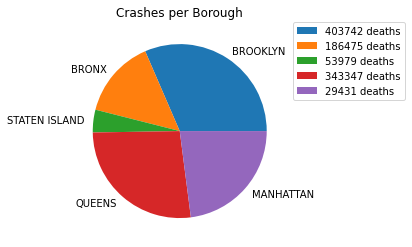

In [34]:
#now to present the data i am making a pie chart. the pie chart shows the crashes per borough (each slice)
    ##in relation to all the crashes (the whole cirlce).
        ##i also added a key to show the viewer how many crashes there were per slice

num = ["403742 deaths", "186475 deaths", "53979 deaths", "343347 deaths", "29431 deaths"]
plt.pie(crash_list, labels = crash_label)
plt.title("Crashes per Borough")
plt.legend(num, bbox_to_anchor=(1,1.025), loc="upper left")
plt.show()

In [35]:
#next, i aimed to see how many deaths there were per borough caused by car crashes
d_by_borough = nyc_crash1.groupby("BOROUGH")["NUMBER OF PERSONS KILLED"].sum()
    ##this code traverses the dataset and adds the number of people killed 

d_by_borough

BOROUGH
BRONX            208.0
BROOKLYN         513.0
MANHATTAN        274.0
QUEENS           446.0
STATEN ISLAND     79.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

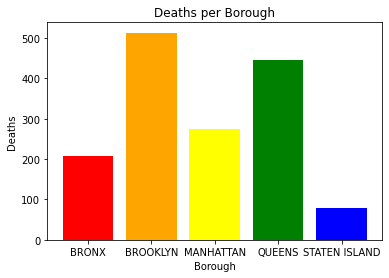

In [36]:
#first, i take the above data and put them into lists
    ##then i format the  bar graph, give it colors, and tell it it "show"
Borough = ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']
Deaths = [208.0, 513.0, 274.0, 446.0, 79.0]

plt.bar(Borough, Deaths, color = ['red','orange','yellow', 'green','blue'])
plt.title('Deaths per Borough')
plt.xlabel('Borough')
plt.ylabel('Deaths')
plt.show()

In [37]:
#here, i aimed to find how many crashes happened per year in order to make a line graph
    ##i created a for loop to traverse the list and change all of the date values to strings
        ##then the for loop sees what year is contained in the crash date and adds it to a dictionary
crash_year = nyc_crash1["CRASH DATE"]
crash_per_year = {}

#this for loop goes through all the rows and adds them to a dictionary depending on the year of the crash
for i in crash_year:
    i = str(i)
    if '2012' in i:
        i = '2012'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2013' in i:
        i = '2013'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2014' in i:
        i = '2014'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2015' in i:
        i = '2015'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2016' in i:
        i = '2016'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2017' in i:
        i = '2017'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2018' in i:
        i = '2018'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2019' in i:
        i = '2019'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2020' in i:
        i = '2020'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
    if '2021' in i:
        i = '2021'
        if i not in crash_per_year:
            crash_per_year[i] = 1
        else:
            crash_per_year[i] += 1
        
crash_per_year

{'2012': 100545,
 '2013': 203734,
 '2014': 206033,
 '2015': 217694,
 '2016': 229831,
 '2017': 231007,
 '2018': 231564,
 '2019': 211486,
 '2020': 112915,
 '2021': 110542}

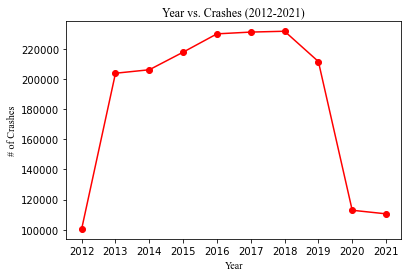

In [38]:
#here, i make the line graph for the data
    ##i used https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values to adjust the dictionary so i could use them for the graph
lists = sorted(crash_per_year.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, color='red', marker='o')
plt.title('Year vs. Crashes (2012-2021)',fontname="Times New Roman")
plt.xlabel('Year',fontname="Times New Roman")
plt.ylabel('# of Crashes',fontname="Times New Roman")
plt.show()

## Working with my results

In [40]:
class Borough:
    def __init__(self, borough):
        self.borough = borough
        
    def bstatement(self):
        if self.borough == "Queens":
            print(f"The Borough, {self.borough}, is the largest borough by sq feet.")
        elif self.borough == "Staten Island":
            print(f"The Borough, {self.borough}, is the second largest borough by sq feet.")
        elif self.borough == "Broooklyn":
            print(f"The Borough, {self.borough}, is the third largest borough by sq feet.")
        elif self.borough == "Bronx":
            print(f"The Borough, {self.borough}, is the fourth largest borough by sq feet.")
        elif self.borough == "Manhattan":
            print(f"The Borough, {self.borough}, is the smallest borough by sq feet.")
            
class Crash:
    def __init__(self, borough, crashes, deaths, cars, population):
        #super().__init__(borough)
        self.borough = borough
        self.crashes = crashes
        self.deaths = deaths
        self.cars = cars
        self.population = population
        
    def crashpercars(self):
        cpc = self.crashes/self.cars/9
        cpcinverse = int(1/cpc)
        print(f"In {self.borough}, per year, there is 1 crash per {cpcinverse} cars owned between 2012 and 2021.")
    
    def deathpercars(self):
        dpc = self.deaths/self.cars/9
        dpcinverse = int(1/dpc)
        print(f"In {self.borough}, per year, there is 1 death per {dpcinverse} cars owned between 2012 and 2021.")

    def crashperpop(self):
        cpp = self.crashes/self.population/9
        cppinverse = int(1/cpp)
        print(f"In {self.borough}, per year, there is 1 crash per {cppinverse} persons between 2012 and 2021.")
        
    def deathpercrash(self):
        dpcrash = self.deaths/self.crashes
        dpcrashinverse = int(1/dpcrash)
        print(f"In {self.borough}, there are 1 death per {dpcrashinverse} crashes between 2012 and 2021")
    
            
            
            
b1 = Borough("Bronx")
b1.bstatement()

cqueens = Crash("Queens", 343347, 446, 837319, 2405464)
csi = Crash("Staten Island", 53979, 79, 283928, 495747)
cbronx = Crash("Bronx", 186475, 208, 290055 ,1472654)
cbrooklyn = Crash("Brooklyn", 403742, 513, 524701, 1472654 )
cman = Crash("Manhattan", 294231, 274, 250270, 1694263)

print("")
cqueens.crashpercars()
cqueens.deathpercars()
cqueens.crashperpop()
cqueens.deathpercrash()

print("")
csi.crashpercars()
csi.deathpercars()
csi.crashperpop()
csi.deathpercrash()

print("")
cbronx.crashpercars()
cbronx.deathpercars()
cbronx.crashperpop()
cbronx.deathpercrash()

print("")
cbrooklyn.crashpercars()
cbrooklyn.deathpercars()
cbrooklyn.crashperpop()
cbrooklyn.deathpercrash()

print("")
cman.crashpercars()
cman.deathpercars()
cman.crashperpop()
cman.deathpercrash()

The Borough, Bronx, is the fourth largest borough by sq feet.

In Queens, per year, there is 1 crash per 21 cars owned between 2012 and 2021.
In Queens, per year, there is 1 death per 16896 cars owned between 2012 and 2021.
In Queens, per year, there is 1 crash per 63 persons between 2012 and 2021.
In Queens, there are 1 death per 769 crashes between 2012 and 2021

In Staten Island, per year, there is 1 crash per 47 cars owned between 2012 and 2021.
In Staten Island, per year, there is 1 death per 32346 cars owned between 2012 and 2021.
In Staten Island, per year, there is 1 crash per 82 persons between 2012 and 2021.
In Staten Island, there are 1 death per 683 crashes between 2012 and 2021

In Bronx, per year, there is 1 crash per 13 cars owned between 2012 and 2021.
In Bronx, per year, there is 1 death per 12550 cars owned between 2012 and 2021.
In Bronx, per year, there is 1 crash per 71 persons between 2012 and 2021.
In Bronx, there are 1 death per 896 crashes between 2012 and 2021

## Conlusions

- You are most likely to get into a car crash in Manhattan (Manhattan has the highest crash per car ratio)
- You are most likely to die from a car crash in Staten Island (SI has the highest death per crash ratio)
- The highest crash per persons ratio is in Brooklyn
- The highest death per cars owned ratio is in Manhattan

Overall, Manhattan has the highest risk of getting in a car crash, but Staten Island has the highest risk of dying from a car crash. So, which is more dangerous? In my opinion, I think that Staten Island would be more dangerous because in Manhattan the drivers are going very slow due to traffic and tight roads, therefore most crashes are low injury/death crashes. Whereas, in Staten Island, there arent nearly as many crashes per car, but the fact that the death toll is much higher than in Manhattan, I would steer clear of Staten Island. 